# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования:
1. Изучить данные о продажах недвижимости на премере данного выгрузки
2. Понять как строится исследование, выяснить какие факты скрываются в данных
3. Дать оценку исследованию и установив все факторы влияния на продажи и ценообразование

Этапы исследования:
- Импорт и изучение структуры и наполнения файла
- Обработать данные с учетом найденых проблем 
- Добавим новые столбцы и показатели для будующего исследования 
- На основании итоговых результатов проведем анализ данных и добавим графики
- Итоговое заключение по работе

### Откройте файл с данными и изучите общую информацию. 

##### Загрузить данные из файла в датафрейм.
##### Изучить общую информацию о полученном датафрейме.
##### Постройть общую гистограмму для всех числовых столбцов таблицы.

In [1]:
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # открываем файл , разделитель "Табуляция"
data.head() # выводим первые строки 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [3]:
data.info() # смотрим на структуру датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.duplicated().sum() # смотрим на количество задублированных строк

0

In [5]:
corr = data.corr() #создадим переменную таблицы корреляции
corr.style.background_gradient(cmap='coolwarm') # применим к ней фон и условное форматирование

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,nan,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,nan,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


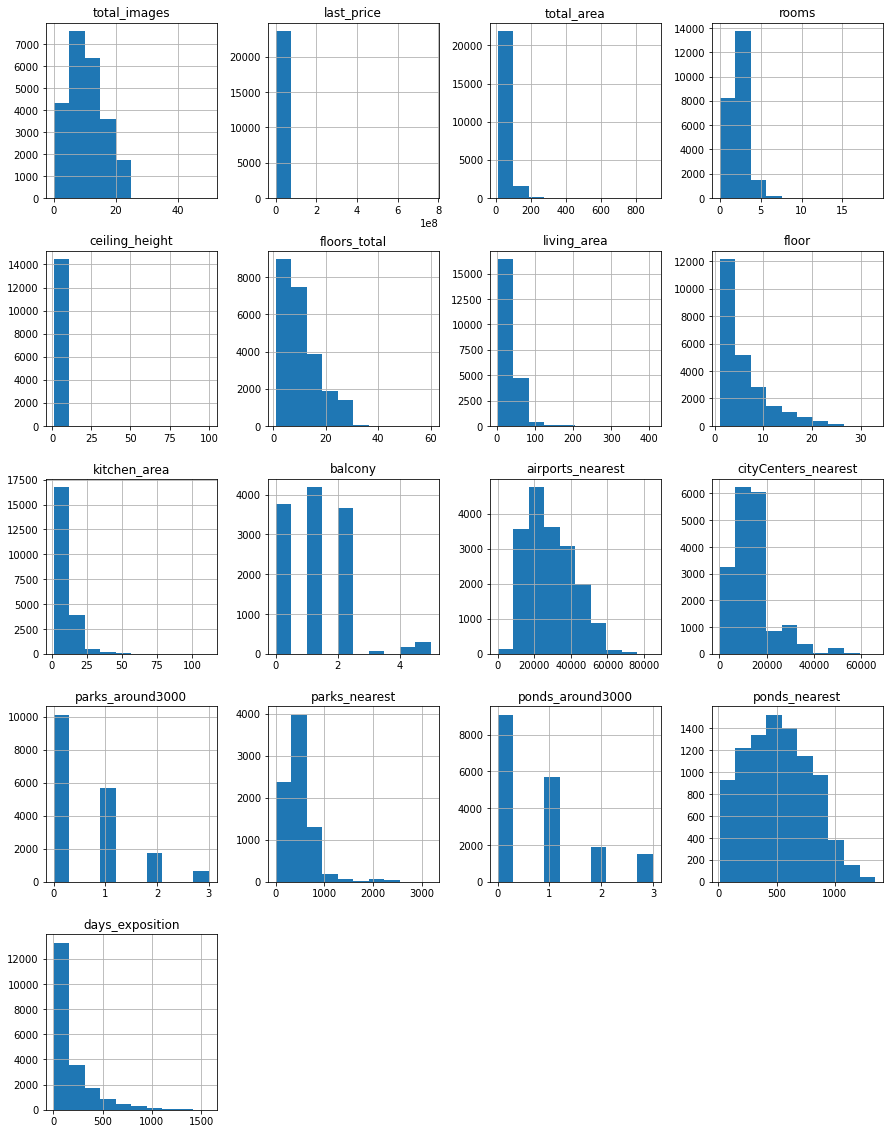

In [6]:
#Смотрим на гистограмы значений столбцов
data.hist(figsize=(15, 20)) 
plt.show();

#### Открыли файл, взглянули на данные , посмотрели корреляцию между столбцами , а так же вывели гистограмы значений в по столбцам датафрейма, выявили аномальные столбцы и зависимости.

### Предобработка данных

##### Найти и изучить пропущенные значения в столбцах:
 
Определите, в каких столбцах есть пропуски.
Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
##### Рассмотреть типы данных в каждом столбце:
 
Найдите столбцы, в которых нужно изменить тип данных.
Преобразуйте тип данных в выбранных столбцах.
В ячейке с типом markdown поясните, почему нужно изменить тип данных.
##### Изучить уникальные значения в столбце с названиями и устраните неявные дубликаты. 
Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.
##### Найти и устранить редкие и выбивающиеся значения.  
Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
 
Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
В противном случае удалите редкие и выбивающиеся значения.
В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.

#### Ищем пустые значения в столбцах

In [7]:
data.isna().sum() # Вызываем функцию подсчета пустых значений по столбцам 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.dropna(subset=['locality_name'], inplace=True) #удаляем пустые строки без идентифекатора местности

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype(int) #замена пустых значений столбца балкон на 0

In [10]:
data['days_exposition'] = data['days_exposition'].fillna(0) #замена пустых значений столбца дней размещения на 0

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(0) #замена пустых значений столбца площадь кухни на 0

In [12]:
data[data['ceiling_height'].isna()] # строки пустых значений высоты потолков 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,0.00,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,"3,200,000.00",39.00,2017-12-16T00:00:00,1,NaN,9.00,20.00,6,NaN,...,11.00,2,Санкт-Петербург,"40,837.00","16,704.00",0.00,NaN,0.00,NaN,38.00
23690,3,"5,500,000.00",52.00,2018-07-19T00:00:00,2,NaN,5.00,31.00,2,NaN,...,6.00,0,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,NaN,15.00
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,NaN,5.00,17.50,4,NaN,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00


In [13]:
data[data['floors_total'].isna()] # строки пустых значений общего количества этажей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.00",65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,0,Санкт-Петербург,"39,197.00","12,373.00",1.00,123.00,0.00,NaN,49.00
237,4,"2,438,033.00",28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,0.00,0,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,251.00
457,4,"9,788,348.00",70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,727.00
671,4,"6,051,191.00",93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,123.00
1757,5,"3,600,000.00",39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,0.00,0,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,"8,500,000.00",63.50,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,0.00,0,Санкт-Петербург,"51,340.00","15,363.00",0.00,NaN,1.00,853.00,512.00
22656,4,"4,574,160.00",64.50,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,127.00
22808,0,"14,569,263.00",110.40,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0,Санкт-Петербург,"19,095.00","4,529.00",0.00,NaN,0.00,NaN,260.00
23590,0,"21,187,872.00",123.30,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0,Санкт-Петербург,"19,095.00","4,529.00",0.00,NaN,0.00,NaN,104.00


In [14]:
data[data['living_area'].isna()] # строки пустых значений жилой площади 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,0.00,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,0.00
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,NaN,9.00,NaN,2,NaN,...,0.00,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,"1,990,000.00",45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,NaN,...,0.00,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,"5,350,000.00",40.00,2018-11-18T00:00:00,1,NaN,22.00,NaN,3,NaN,...,0.00,1,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,"5,950,000.00",80.30,2018-07-03T00:00:00,3,2.70,12.00,NaN,5,NaN,...,0.00,0,Колпино,"27,933.00","33,719.00",0.00,NaN,2.00,562.00,60.00
23663,12,"6,400,000.00",88.00,2018-01-12T00:00:00,4,2.55,10.00,NaN,1,NaN,...,0.00,0,Санкт-Петербург,"33,642.00","13,943.00",0.00,NaN,2.00,844.00,59.00
23670,9,"2,450,000.00",45.60,2018-02-08T00:00:00,1,2.80,9.00,NaN,2,NaN,...,0.00,0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23679,0,"2,500,000.00",35.00,2017-12-08T00:00:00,1,NaN,9.00,NaN,4,NaN,...,0.00,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00


In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

#### Преобразуем тип данных в возможных столбцах

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
data['days_exposition'] = data['days_exposition'].astype(int)
data['balcony'] = data['balcony'].astype(int) 

#### Поиск не явных дубликатов в столбце locality_name

In [18]:
print(data['locality_name'].str.lower().value_counts())
print('Общее количество строк:', data['locality_name'].str.lower().duplicated().sum())

санкт-петербург              15721
посёлок мурино                 522
посёлок шушары                 440
всеволожск                     398
пушкин                         369
                             ...  
деревня мануйлово                1
деревня сижно                    1
коттеджный посёлок лесное        1
посёлок коробицыно               1
деревня куровицы                 1
Name: locality_name, Length: 364, dtype: int64
Общее количество строк: 23286


In [19]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [20]:
data[data['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,0
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,0.00,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,0,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,0
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,...,0.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,...,23.30,2,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602


#### Находим и убераем редкие и выбивающиеся значения в столбцах

In [21]:
data[data['ceiling_height'] >= 4] # Аномальновысокие значние уровня высоты потолков в зданиях, что говорит он не корректном занесении данных
data[data['ceiling_height'] < 2] # Аномальнонизкие значние уровня высоты потолков в зданиях, что говорит он не корректном занесении данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,"1,500,000.00",42.80,2017-08-14T00:00:00,2,1.20,2.00,27.50,1,NaN,...,5.20,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248
16934,5,"4,100,000.00",40.00,2017-10-17T00:00:00,1,1.75,37.00,17.40,5,NaN,...,8.34,0,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,71
22590,16,"6,000,000.00",55.00,2018-10-31T00:00:00,2,1.00,12.00,32.40,7,NaN,...,10.00,0,Санкт-Петербург,"33,053.00","14,217.00",2.00,293.00,2.00,289.00,13


In [22]:
# Удаляем строки аномальные значения высоты потолков в квартирах
data.drop(data[(data['ceiling_height'] >= 4) 
               | (data['ceiling_height'] <= 2)].index, inplace=True)
# Удаляем строки аномальные значения высоты потолков в квартирах
data.drop(data[(data['ceiling_height'] >= 4) 
               | (data['ceiling_height'] <= 2)].index, inplace=True) 

#### Вывод: 
    -Исследовали все остутсвующие значения. 
    -Разобрались с некоторыми путём заполнения их нулем по возможности и изменением типа столбца на целочисленный, в некоторых оставили значения как есть, из за большого влияния на целостность данных. 
    -В данных присутствуют множество не корректных значений по типу аномалий с высотой потолка, что говорит нам об ошибке в заполнении/хранении данных. 
    -Было обнаружено некоторое количество продаж без указания места продажи, такие данные не к чему присвоить - их лучше убрать из таблицы. 

### Посчитайте и добавьте в таблицу новые столбцы

##### Добавить в таблицу новые столбцы со следующими параметрами:
    -цена одного квадратного метра;
    -день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    -месяц публикации объявления;
    -год публикации объявления;
    -тип этажа квартиры (значения — «первый», «последний», «другой»);
    -расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [23]:
#data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(2) #создадим столбец отдаленности от центра в км
#data['airports_nearest_km'] = (data['airports_nearest']/1000).round(2) #создадим столбец отдаленности от центра в км
#data['parks_nearest_km'] = (data['parks_nearest']/1000).round(2) #создадим столбец отдаленности от центра в км
#data['ponds_nearest_km'] = (data['ponds_nearest']/1000).round(2) #создадим столбец отдаленности от центра в км

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправелнение замечания - округляем до целых значений :</div>

In [24]:
# Cоздадим столбец отдаленности от центра в км
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0) 
# Cоздадим столбец отдаленности от центра в км
data['airports_nearest_km'] = (data['airports_nearest']/1000).round(0) 
# Cоздадим столбец отдаленности от центра в км
data['parks_nearest_km'] = (data['parks_nearest']/1000).round(0) 
# Cоздадим столбец отдаленности от центра в км
data['ponds_nearest_km'] = (data['ponds_nearest']/1000).round(0)
# Добавлеяем столбец с средней ценой на общую площадь кв.м.
data['price_by_area'] = (data['last_price'] / data['total_area']).round(0)

In [25]:
# Список недвижимости в Питербурге
spb = data[data['locality_name'].str.contains('Санкт-Петербург')]

In [26]:
# Создаем столбец формата DataTime, а затем: столбцы Года, месяца, дня, и дня недели
data['first_day_exposition_dt'] = pd.to_datetime(data['first_day_exposition'])
data['year'] = data['first_day_exposition_dt'].dt.year
data['month'] = data['first_day_exposition_dt'].dt.month
data['day'] = data['first_day_exposition_dt'].dt.day
data['dayofweek'] = data['first_day_exposition_dt'].dt.dayofweek

In [27]:
data.loc[:, 'floor_location'] = 'другой' # Добавляем столбец распложоения этажа
data.loc[data['floor'] == 1, 'floor_location'] = 'первый' # Определяем первый этаж 
data.loc[data['floor'] == data['floors_total'], 'floor_location'] = 'последний' # Определеяем последний этаж
data['floor_location'].value_counts() # Считаем значения в столбцах

другой       17331
последний     3319
первый        2873
Name: floor_location, dtype: int64

# Удаляем строки аномальные значения высоты потолков в квартирах
data.drop(data[(data['ceiling_height'] >= 4) 
               | (data['ceiling_height'] <= 2)].index, inplace=True)

In [28]:
# Список недвижимости в посёлках и селах
village = data[(data['locality_name'].str.contains('деревня')) | 
               (data['locality_name'].str.contains('посёлок')) |
               (data['locality_name'].str.contains('поселок')) |
               (data['locality_name'].str.contains('поселок'))]

In [29]:
# Делаем сводную таблицу из полученных данных списка village и смотрим на информацию по продаваемым местам, типам этажа
village.pivot_table(index=['locality_name','floor_location'],
                    values=['last_price','price_by_area'],
                    aggfunc={'last_price': 'count','price_by_area': 'mean'}).sort_values(by='last_price',
                                                                                         ascending=False).head(20)

,,last_price,price_by_area
locality_name,floor_location,,
посёлок Мурино,другой,474,"85,906.35"
посёлок Шушары,другой,330,"79,430.96"
посёлок Парголово,другой,294,"91,345.65"
деревня Кудрово,другой,276,"92,424.68"
деревня Новое Девяткино,другой,116,"77,430.74"
посёлок Шушары,первый,56,"75,394.89"
деревня Старая,другой,56,"65,009.30"
посёлок Шушары,последний,54,"77,476.22"
посёлок Бугры,другой,53,"82,717.43"


In [30]:
# Сводная общего Датафрейма 
data.groupby(['locality_name','floor_location'])['last_price','price_by_area'].max().sort_values(['last_price','price_by_area'],ascending=False).head(10)

/tmp/ipykernel_252/4294849231.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['locality_name','floor_location'])['last_price','price_by_area'].max().sort_values(['last_price','price_by_area'],ascending=False).head(10)


last_price        price_by_area
locality_name   floor_location                                          
Санкт-Петербург последний            763,000,000.00         1,907,500.00
                другой               330,000,000.00         1,736,842.00
                первый               135,000,000.00           813,253.00
Пушкин          другой                42,000,000.00           168,468.00
Колпино         первый                36,900,000.00           106,187.00
Пушкин          последний             29,500,000.00           256,522.00
посёлок Репино  последний             28,000,000.00           175,000.00
Пушкин          первый                25,717,300.00           160,000.00
Всеволожск      другой                24,412,900.00           640,422.00
Зеленогорск     другой                23,000,000.00           323,944.00

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='price_by_area'>

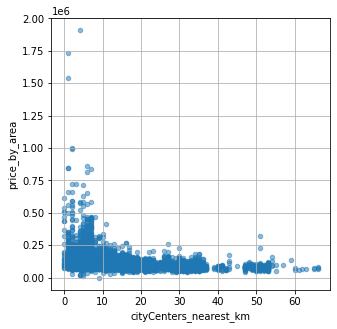

In [31]:
# График зависимости цены отдаленности от центра
data.plot(x='cityCenters_nearest_km',
          y='price_by_area',
          kind='scatter',
          figsize=(5, 5),
          grid=True,
         alpha=0.5) 

<AxesSubplot:xlabel='ponds_nearest_km', ylabel='price_by_area'>

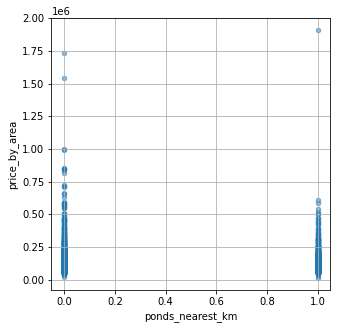

In [32]:
# График зависимости цены отдаленности от центра
data.plot(x='ponds_nearest_km',
          y='price_by_area',
          kind='scatter',
          figsize=(5, 5),
          grid=True,
         alpha=0.5) 

<AxesSubplot:xlabel='ceiling_height', ylabel='price_by_area'>

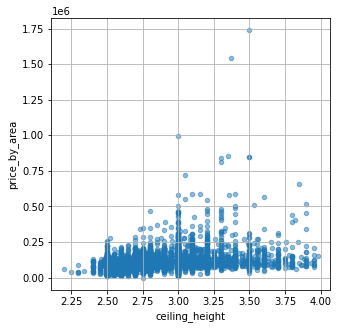

In [33]:
# График зависимости цены отдаленности от высоты потолков
data.plot(x='ceiling_height',
          y='price_by_area',
          kind='scatter',
          figsize=(5, 5),
          grid=True,
         alpha=0.5) 

#### Вывод: Вся необходимая инфомация добавлена в датафрейм. Можно проверять строить графики, формулировать гепотезы, проверять выводы.

### Проведите исследовательский анализ данных

##### Изучить следующие параметры объектов: 
    -общая площадь
    -жилая площадь
    -площадь кухни
    -цена объекта
    -количество комнат
    -высота потолков
    -этаж квартиры
    -тип этажа квартиры («первый», «последний», «другой»)
    -общее количество этажей в доме
    -расстояние до центра города в метрах
    -расстояние до ближайшего аэропорта
    -расстояние до ближайшего парка
    -день и месяц публикации объявления
###### Построить отдельные гистограммы для каждого из этих параметров. 
 >Описать все наблюдения по параметрам в ячейке с типом markdown.

##### Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.  
    -Построить гистограмму.
    -Посчитать среднее и медиану.
    -В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
##### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    Изучить, зависит ли цена от:
    -общей площади;
    -жилой площади;
    -площади кухни;
    -количества комнат;
    -этажа, на котором расположена квартира (первый, последний, другой);
    -даты размещения (день недели, месяц, год).
    Построить графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией  использовать сводные таблицы.
##### Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Данные можно найти по имени в столбце locality_name.
##### Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Как стоимость объектов зависит от расстояния до центра города?

<div class="alert alert-info"> <b>Комментарии студента:</b> Разбил работу на пункты перенес шаги в нужные разделы</div>

#### Изучаем параметры объектов

#Смотрим на гистограмы значений столбцов
data[['total_area',
      'living_area',
      'kitchen_area',
      'floors_total',
      'floor',
      'rooms',
      'ceiling_height',
      'cityCenters_nearest_km',
      'airports_nearest_km',
      'parks_nearest_km',
      'ponds_nearest_km',
      'month',
      'day']].hist(figsize=(10, 10)) 

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

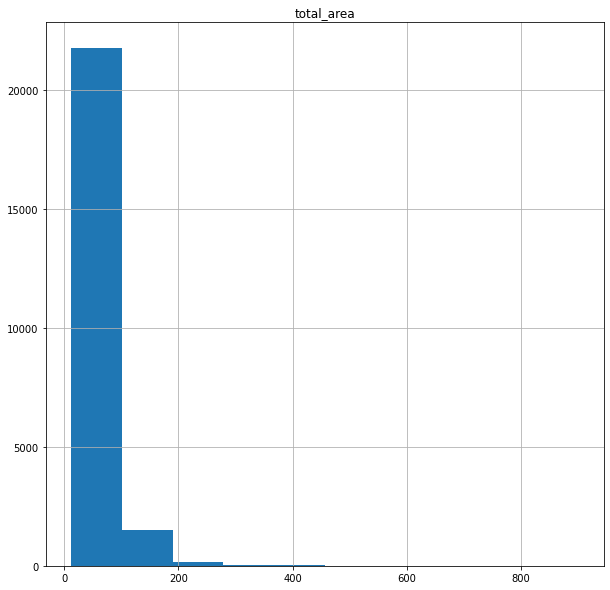

In [34]:
#Смотрим на гистограмы значений столбцов
data[['total_area',]].hist(figsize=(10, 10)); 

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

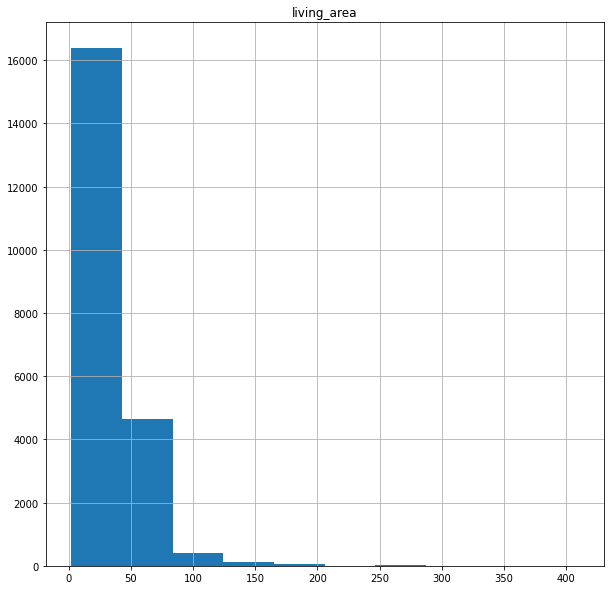

In [35]:
#Смотрим на гистограмы значений столбцов
data[['living_area']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

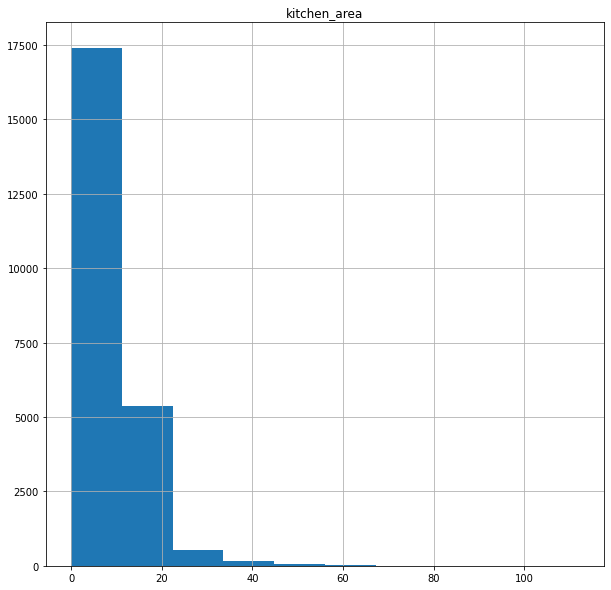

In [36]:
#Смотрим на гистограмы значений столбцов
data[['kitchen_area']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

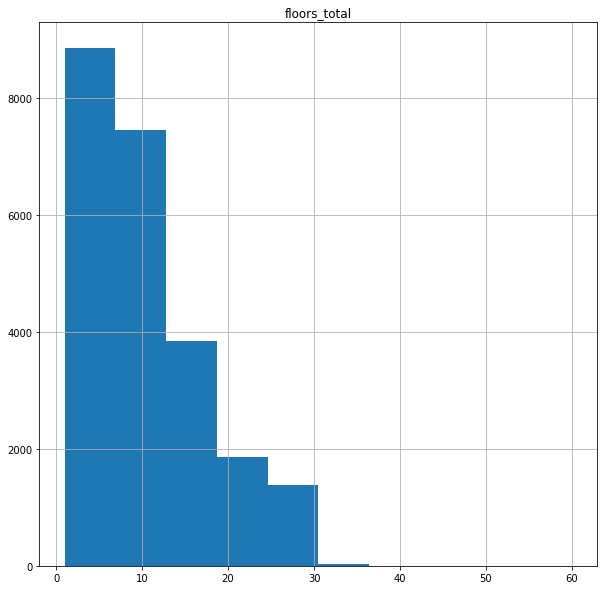

In [37]:
#Смотрим на гистограмы значений столбцов
data[['floors_total']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

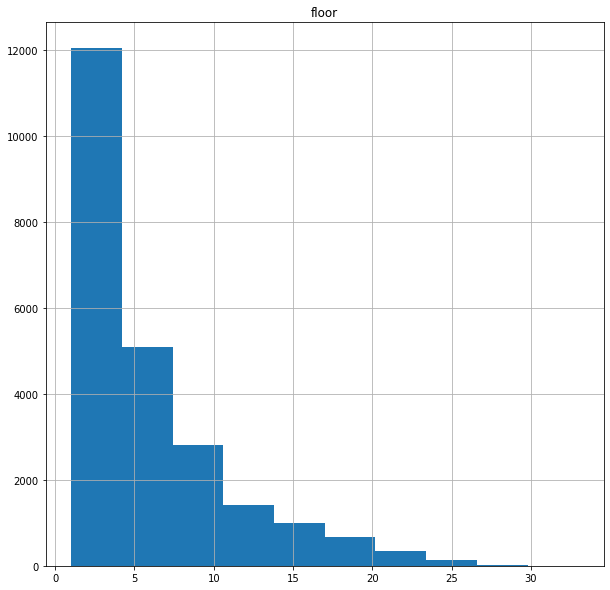

In [38]:
#Смотрим на гистограмы значений столбцов
data[['floor']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

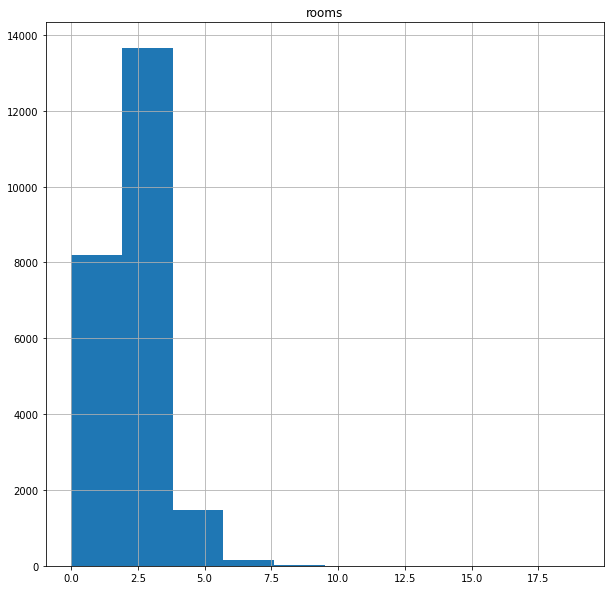

In [39]:
#Смотрим на гистограмы значений столбцов
data[['rooms']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

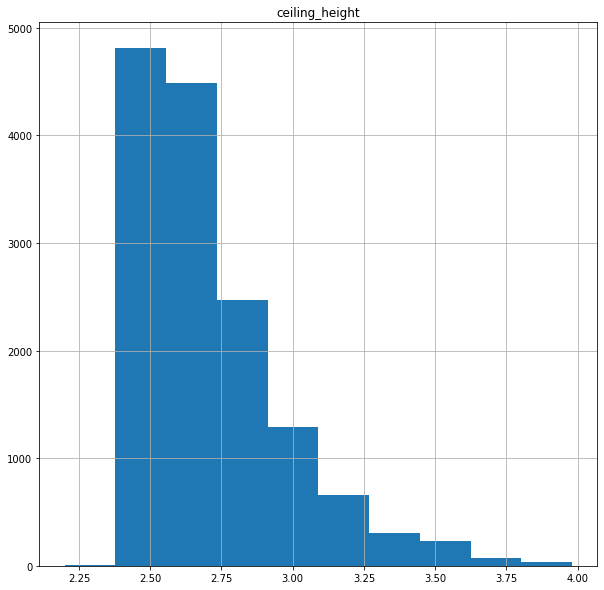

In [40]:
#Смотрим на гистограмы значений столбцов
data[['ceiling_height']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'cityCenters_nearest_km'}>]],
      dtype=object)

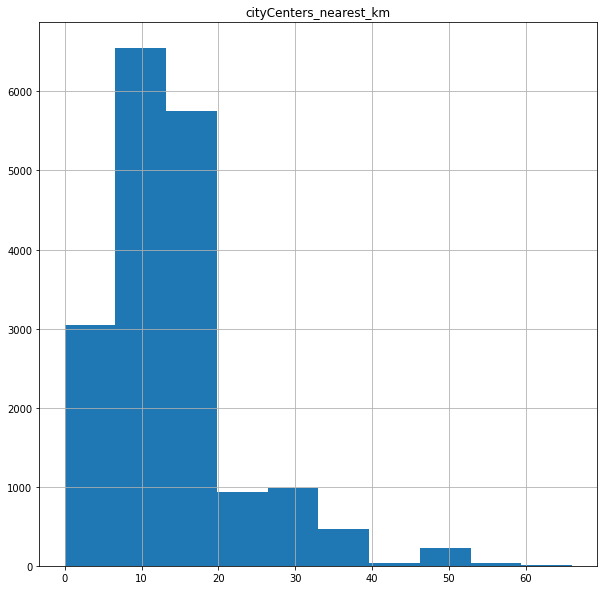

In [41]:
#Смотрим на гистограмы значений столбцов
data[['cityCenters_nearest_km']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'airports_nearest_km'}>]],
      dtype=object)

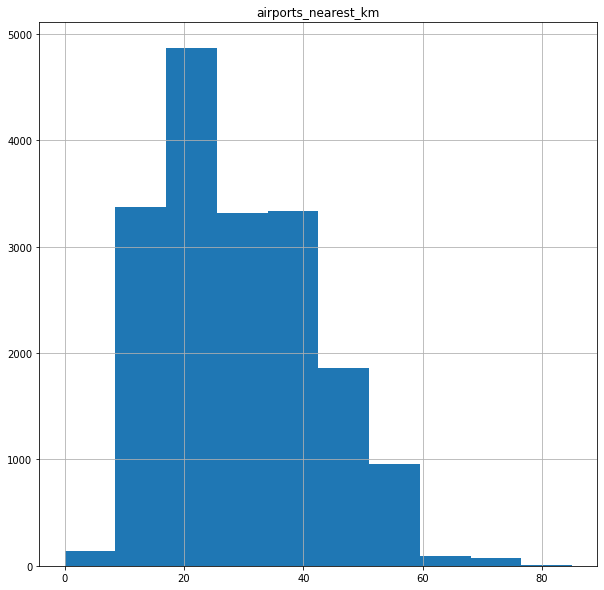

In [42]:
#Смотрим на гистограмы значений столбцов
data[['airports_nearest_km']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'parks_nearest_km'}>]], dtype=object)

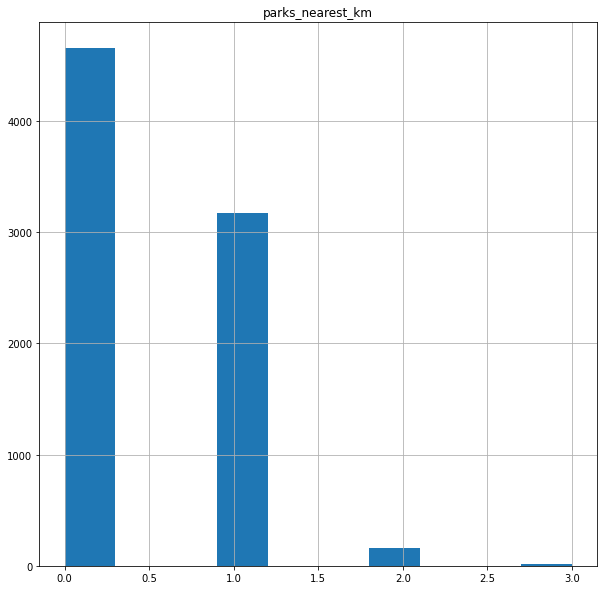

In [43]:
#Смотрим на гистограмы значений столбцов
data[['parks_nearest_km']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'ponds_nearest_km'}>]], dtype=object)

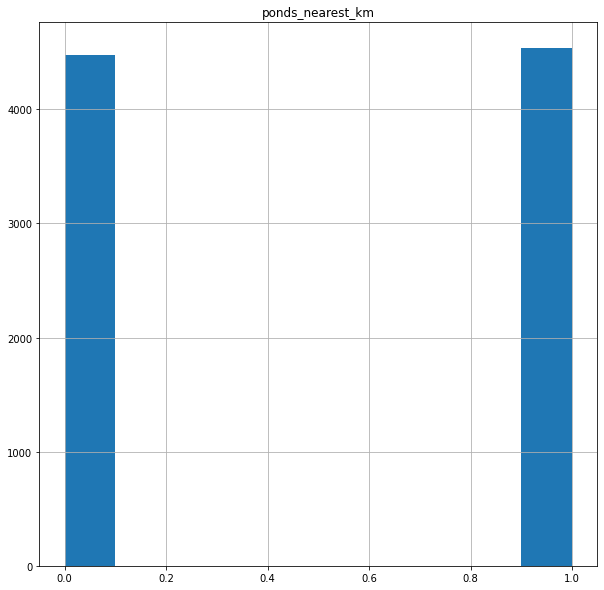

In [44]:
#Смотрим на гистограмы значений столбцов
data[['ponds_nearest_km']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

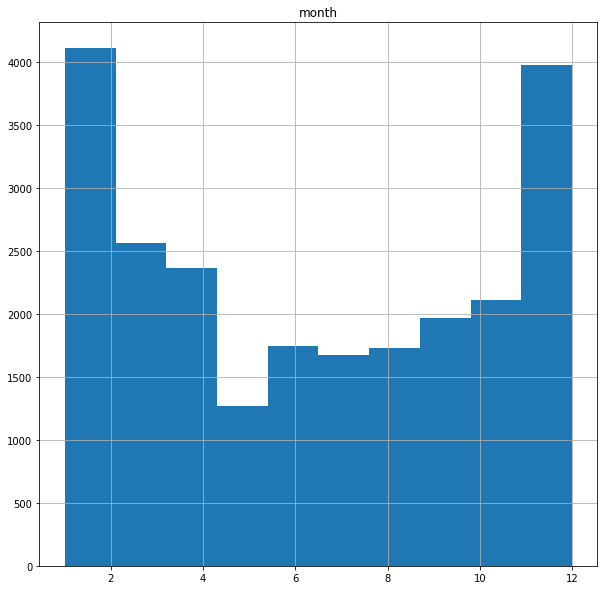

In [45]:
#Смотрим на гистограмы значений столбцов
data[['month']].hist(figsize=(10, 10)) ;

array([[<AxesSubplot:title={'center':'day'}>]], dtype=object)

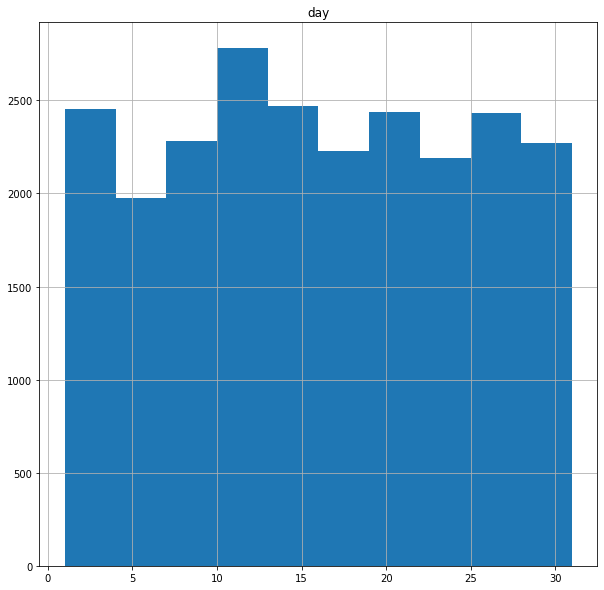

In [46]:
#Смотрим на гистограмы значений столбцов
data[['day']].hist(figsize=(10, 10)) ;

<AxesSubplot:>

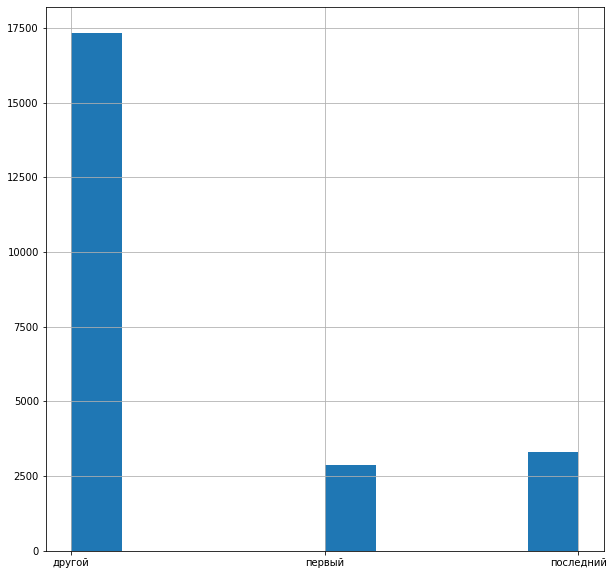

In [47]:
#Смотрим на гистограмы значений столбцов
data['floor_location'].hist(figsize=(10, 10)) 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Полученные данные соответствуют реалиям
</div>

<AxesSubplot:>

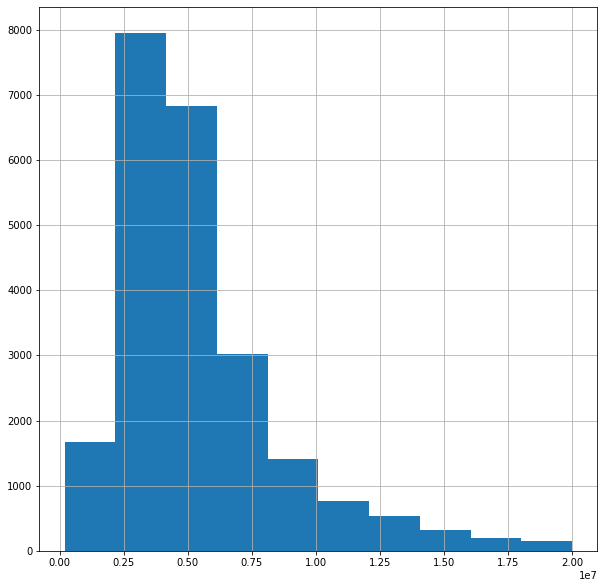

In [48]:
#Смотрим на гистограмы значений столбцов
data['last_price'].hist(bins=10, range=(200000, 20000000),figsize=(10, 10)) 

        На графиках мы видим расположение значений total_area, living_area, kitchen_area, floors_total, floor, rooms, ceiling_height в пределах нормы и выглядят симетрично, без аномалий. 
        Праметры показателей сenters_nearest, parks_nearest, airports_nearest, ponds_nearest видно что данные по отдаленности от центра так как и аэропортов находятся приемущественно от 0 до 35 км (что говорит о корректной выборке Недвижимости в пределах Санкт-Питербурга), а ближайшие парки находятся в черте города в радиусе 2ух км, пруды находятся в пределах 1 км приемущественно.
        Во времненных показателях month и day мы видим большие значения в начале и конце года, затем последующий спад, у дней значения в среднем равны.
        Касаемо расположения этажей, те кто приобретают жилье стараются избегать первых и последних
        Основные значения стоимости продажи распологаются от 2.5 млн до 8 млн рублей

#### Проверим необходимые корреляции 

Среднее время продажи недвижимости: 156.0
Среднее время продажи недвижимости: 73.0


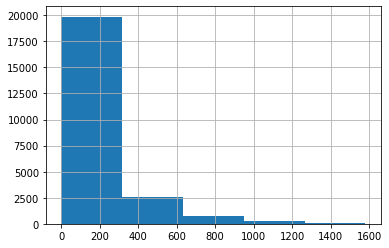

In [49]:
# График среднего времени продаж обьектов недвижимости в днях продаж 
data['days_exposition'].hist(bins=5) 
print('Среднее время продажи недвижимости:', round(data['days_exposition'].mean(),0))
print('Среднее время продажи недвижимости:', round(data['days_exposition'].median(),0))

In [50]:
data['days_exposition'].describe()

count              23,523.00
mean                  156.23
std                   213.25
min                     0.00
25%                    22.00
50%                    73.00
75%                   197.50
max                 1,580.00
Name: days_exposition, dtype: float64

        Теперь мы узнали среднее время за которое реализуют недвижимость в нашем Датафрейме это 156 дней, а медианое значение 73 дня. Именно то что показывает нам график смешения значений влево. Значения дней продаж более года почти на 100% отклоняют среднее от медианы. Максимальная продажа в днях длилась 1580 дней , а это 4.3 года ! Минимальная же не заняла не дня - кому-то повезло!(или ошибки в данных)

#### Рассмотрим наибольшие факторы влияющие на общую (полную) стоимость объекта

In [51]:
# Выводим корреляции продаж от необходимых параметров
print('Завсимость стоимости продажи от общей площади недвижимости', data['last_price'].corr(data['total_area']).round(3))
print('Завсимость стоимости продажи от жилой площади недвижимости', data['last_price'].corr(data['living_area']).round(3))
print('Завсимость стоимости продажи от площади кухни недвижимости', data['last_price'].corr(data['kitchen_area']).round(3))
print('Завсимость стоимости продажи от количества комнат ', data['last_price'].corr(data['rooms']).round(3))
print('Завсимость стоимости продажи от дня недели', data['last_price'].corr(data['dayofweek']).round(3))
print('Завсимость стоимости продажи от месяца', data['last_price'].corr(data['month']).round(3))
print('Завсимость стоимости продажи от года', data['last_price'].corr(data['year']).round(3)) 

Завсимость стоимости продажи от общей площади недвижимости 0.644
Завсимость стоимости продажи от жилой площади недвижимости 0.553
Завсимость стоимости продажи от площади кухни недвижимости 0.376
Завсимость стоимости продажи от количества комнат  0.357
Завсимость стоимости продажи от дня недели 0.001
Завсимость стоимости продажи от месяца 0.002
Завсимость стоимости продажи от года -0.04


        Наибольшее влияние на стоимость продаж как ни странно влияет её общая и жилая площадь 

<AxesSubplot:title={'center':'Зависимость цены квартиры от её общей площади'}, xlabel='total_area'>

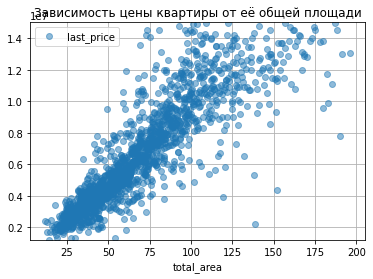

In [52]:
# График зависимости цены квартиры от её площади
data.query('last_price < 15000000 and total_area < 200').pivot_table(index='total_area',
                                                                     values='last_price').plot(style='o',
                                                                                               grid=True,
                                                                                               alpha=0.5,
                                                                                               ylim=[1200000,15000000],
                                                                                               title = 'Зависимость цены квартиры от её общей площади');

        Проверели на графике - заключение верное, зависимость линейная и положительная

<AxesSubplot:title={'center':'Зависимость цены квартиры от её жилой площади'}, xlabel='living_area'>

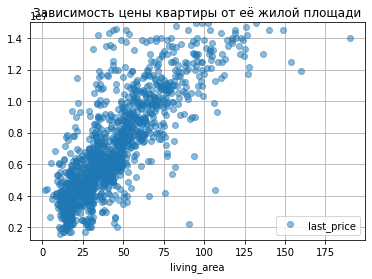

In [53]:
# График зависимости цены квартиры от её площади
data.query('last_price < 15000000 and living_area < 200').pivot_table(index='living_area',
                                                                     values='last_price').plot(style='o',
                                                                                               grid=True,
                                                                                               alpha=0.5,
                                                                                               ylim=[1200000,15000000],
                                                                                               title = 'Зависимость цены квартиры от её жилой площади');

        Распределение зависимостей аналогично общей площади недвижимости, отличительных черт не обнаружено 

<AxesSubplot:title={'center':'Зависимость цены квартиры от её площади кухни'}, xlabel='kitchen_area'>

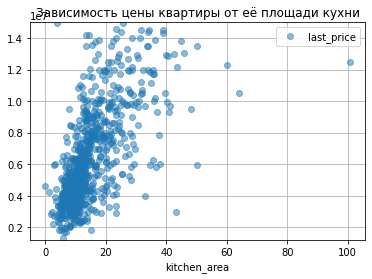

In [54]:
# График зависимости цены квартиры от её площади
data.query('last_price < 15000000 and kitchen_area < 200').pivot_table(index='kitchen_area',
                                                                     values='last_price').plot(style='o',
                                                                                               grid=True,
                                                                                               alpha=0.5,
                                                                                               ylim=[1200000,15000000],
                                                                                               title = 'Зависимость цены квартиры от её площади кухни');

        Данное исследование нам показало что разборос строимости не так завсит от площади кухни 

<AxesSubplot:title={'center':'Зависимость цены квартиры от её площади'}, xlabel='rooms'>

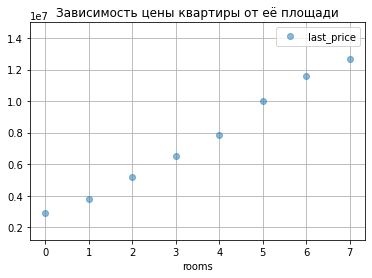

In [55]:
# График зависимости цены квартиры от её площади
data.query('last_price < 15000000 and rooms < 10').pivot_table(index='rooms',
                                                                     values='last_price').plot(style='o',
                                                                                               grid=True,
                                                                                               alpha=0.5,
                                                                                               ylim=[1200000,15000000],
                                                                                               title = 'Зависимость цены квартиры от её площади');

<AxesSubplot:title={'center':'Зависимость цены квартиры от её площади'}, xlabel='year'>

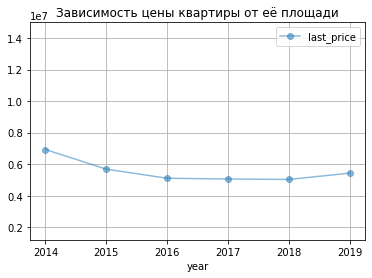

In [56]:
# График зависимости цены квартиры от её площади
data.query('last_price < 15000000').pivot_table(index='year',
                                                                     values='last_price').plot(style='-o',
                                                                                               grid=True,
                                                                                               alpha=0.5,
                                                                                               ylim=[1200000,15000000],
                                                                                               title = 'Зависимость цены квартиры от её площади');

        На данном графике мы видим что с 2014 года цена на жилплощадь к 2016 году упала почти в 2 раза и держалась на таком же уровне до 2019 года

<AxesSubplot:title={'center':'Зависимость цены квартиры от её площади'}, xlabel='dayofweek'>

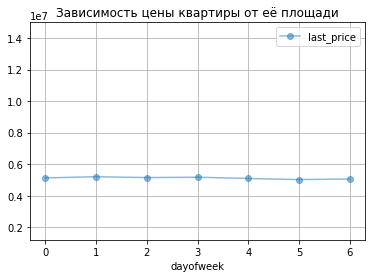

In [57]:
# График зависимости цены квартиры от её площади
data.query('last_price < 15000000 and total_area < 200').pivot_table(index='dayofweek',
                                                                     values='last_price').plot(style='-o',
                                                                                               grid=True,
                                                                                               alpha=0.5,
                                                                                               ylim=[1200000,15000000],
                                                                                               title = 'Зависимость цены квартиры от её площади');


         Зависимости от дня недели мы не наблюдаем

,last_price
month,
1,"4,600,000.00"
2,"4,650,000.00"
3,"4,650,000.00"
4,"4,800,000.00"
5,"4,500,000.00"
6,"4,400,000.00"
7,"4,600,000.00"
8,"4,565,000.00"
9,"4,699,500.00"


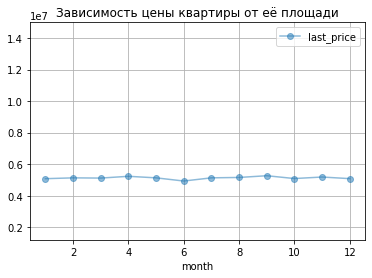

In [58]:
# График зависимости цены квартиры от её площади
data.query('last_price < 15000000 and total_area < 200').pivot_table(index='month',
                                                                     values='last_price').plot(style='-o',
                                                                                               grid=True,
                                                                                               alpha=0.5,
                                                                                               ylim=[1200000,15000000],
                                                                                               title = 'Зависимость цены квартиры от её площади')
data.pivot_table(index='month',values='last_price',aggfunc='median')

        Так же нет зависимости и от месяца 

Общая завсимость стоимости продажи от расположения этажа:
другой                      0.74
последний                   0.14
первый                      0.12
Name: floor_location, dtype: float64


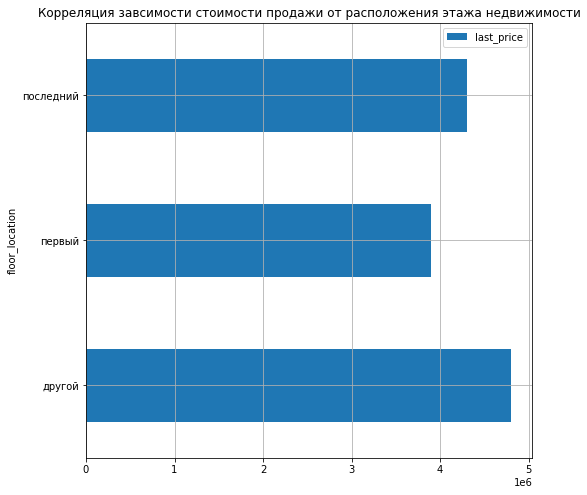

In [59]:
data.pivot_table(index='floor_location',
                 values='last_price',
                 aggfunc='median').plot(kind='barh',
                                      figsize=(8,8),
                                      fontsize=10,
                                      grid=True,
                                     ylabel='Категория этажа',
                                      title='Корреляция завсимости стоимости продажи от расположения этажа недвижимости')
print('Общая завсимость стоимости продажи от расположения этажа:')
print((data['floor_location'].value_counts()/ data['floor_location'].count()))
# Первый и последний этаж - понижающие коэффициенты для стоимости недвижимости. Первый более значимый, чем последний.

        По медианному значению графики немного выровнялись, однако их отношение осталось прежним. Можем сделать вывод что количество "других" этажей отколняют среднее в выборке, что подтверждает нашу гепотизу с желанием покупателей о расположенини этажа.

#### Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [60]:
# Топ 10 локаций с наибольщим количеством продаж и средней ценой
locality_table = data.pivot_table(index='locality_name',
                                  values='price_by_area',
                                  aggfunc=['count', 'median']).round(2)
locality_table.columns = ['count', 'median_price']
locality_top10 = locality_table.sort_values(by='count',
                                            ascending=False).head(10)
locality_top10 

,count,median_price
locality_name,,
Санкт-Петербург,15628,"104,671.50"
посёлок Мурино,520,"85,878.50"
посёлок Шушары,440,"76,876.00"
Всеволожск,395,"65,789.00"
Пушкин,367,"99,987.00"
Колпино,338,"74,723.50"
посёлок Парголово,327,"91,643.00"
Гатчина,305,"67,925.00"
деревня Кудрово,299,"91,860.00"


In [61]:
# Максимальное и минимальное значение выборки
locality_top10[(locality_top10.median_price == locality_top10.median_price.max()) |
               (locality_top10.median_price == locality_top10.median_price.min())] 

,count,median_price
locality_name,,
Санкт-Петербург,15628,"104,671.50"
Выборг,233,"58,308.00"


            Большее количество продаж было совершен в Санкт-Петербурге - 15628 по средней цене 114,503.22 , а наименьшее в городе Выборг - 233 продажи по цене средней цене 58,250.67

#### Выясним как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге

/tmp/ipykernel_252/3161330175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locality_spb['mean_price_km'] = locality_spb_price_km / locality_spb['cityCenters_nearest_km']


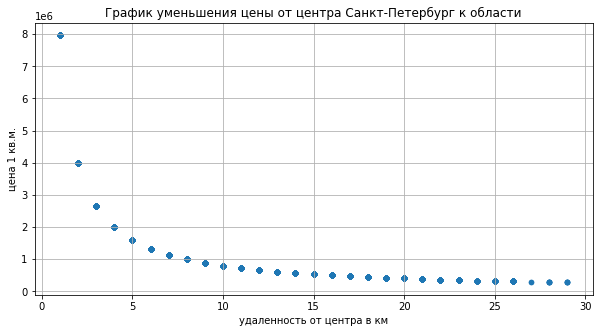

In [62]:
# Выводим график цены за км от центра Санкт-Питербурга
locality_spb = data.query('locality_name == "Санкт-Петербург"')
locality_spb_price_km = locality_spb['last_price'].mean()
locality_spb['mean_price_km'] = locality_spb_price_km / locality_spb['cityCenters_nearest_km']
locality_spb.plot(x='cityCenters_nearest_km',
                  y='mean_price_km',
                  kind='scatter',
                  figsize=(10,5),
                  grid=True).set(xlabel='удаленность от центра в км',
                                 ylabel='цена 1 кв.м.',
                                 title = 'График уменьшения цены от центра Санкт-Петербург к области');

                    По мере отдаление от центра цена заметно падает вплоть до 10 км, затем спад цены существенно замедляется.

#### Вывод из исследовательского анализа данных: 
    Взглянув на данные мы можем увидеть некоторую зависимость стоимости недвижимости от её отдаленности от центра,а так же количества комнат, общей и жилой площади, выявили самые продаваемые локации в нашем датасете и отобразили график проданных квартир в днях, исследовали предпочтения и убедились в выборе расположения этажа у прокупателей, определили наилучшие и растущие регионы Санкт-Питербурга.

### Общий вывод 




        В нашем распоряжении были данные сервиса "Яндекс Недвижимость" — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
        Выполнив предобработку данных и изучив их, мы нашли интересные особенности и зависимости, которые существуют на рынке недвижимости, определились с необходимыми метриками и показателями которые нам нужно внести для того чтобы более детально исследовать рынок недвижимости.
        Добавили необходимую информацию для исследования на основе обработанных данных, разбили по категориям к примеру по типу этажа: первый, последний и другой, почистили данные от пропусков по возможности и выявили аномалии, исправили неточности и опечататки в данных.
        Исследовательский анализ показал нам о харрактере корреляции между данными датасета и отобразили их наглядно в виде графиков и гистограм. Например мы наблюдаем высокую зависимость между площадью жилого помоещения и количества комнат в нём. Остальные же показатели второстепенны.
        Благодаря нашему исследованию мы смогли разобраться в данных, проверить некоторые гепотизы и сформировать представление о рынке продаж недвижимости на основании данных полученных от сервиса "Яндекс Недвижимость" и обработав их необходимым образом. Что в поможет нам ответить на любой интересующий нас вопрос, о продажах в представленных регонах и характере стоимости.


    Рекомендации для бизнеса:
    
    - обратить внимание на Топ 10 продаж по регионам, есть отличные места где покупатели готовы брать жилье.
    - выбирать оптимальную площадь жилья исходя из нашего исследования это от 25м до 100м.
    - так же нужно избегать первых и последних этажей так как на них спрос не велик, хоть и медианная цена практически одинакова.
    - устанавливать цену нужно исходя из всех возможных параметров и окружения, к примеру отдаленности от центра или от ближайшего парка.
    - не стоит надеется на особое время для продажи или покупки квартиры, цена на них не особо менялась, согласно нашему файлу.
    - существуют так же рыночные ограничения по стоимости жилья у нас они от 2.5 млн до 10 млн рублей, это поможет при выборе удачного объекта.
    - следить за количеством продаж в регионах и повышением цены(деревни,поселки,села) т.к. со временем оно растет, исследования помогу узнать где и когда лучше реализоваться.